# Initialize libraries

In [1]:
from unityagents import UnityEnvironment
from collections import deque
from datetime import datetime as dt
from ddpg_agent import Agent
import numpy as np
import random
import torch
import matplotlib.pyplot as plt

INFO:matplotlib.font_manager:Could not open font file /usr/share/fonts/truetype/noto/NotoColorEmoji.ttf


### Import Environment

In [2]:
option1 = UnityEnvironment(file_name='Reacher_Linux/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
brain_name = option1.brain_names[0]
brain = option1.brains[brain_name]

In [4]:
option1_info = option1.reset(train_mode=True)[brain_name]
assert len(option1_info.agents) == 1
action_size = brain.vector_action_space_size
state_size = option1_info.vector_observations.shape[1]

# Initialize Agent

In [5]:
reacher_agent = Agent(state_size,action_size,0)

In [6]:
def reacher(episodes,time):
    done2 = False
    final_target = 30
    score1 = []
    score2 = deque(maxlen=100)
    for episode in range(0, episodes):
        option1_info = option1.reset(train_mode=True)[brain_name]   # We select option 1 of the given choices 
        current_state = option1_info.vector_observations[0]
        reacher_agent.reset()
        score = 0
        for t in range(0,time):
            reacher_agent.reset()                               # Reset reacher agent
            action = reacher_agent.act(current_state)           # Take action based on current state.
            option1_info = option1.step(action)[brain_name]     # Get info from environment based on action 
            next_state = option1_info.vector_observations[0]
            reward = option1_info.rewards[0]                    # Calculate reward recieved for the particular action
            done = option1_info.local_done[0]
            reacher_agent.step(current_state, action, reward, next_state, done)
            current_state = next_state
            score = score + reward
            if done:
                break 
        score1.append(score)
        score2.append(score)
        print("Not done", episode+1, np.mean(score2))      # Keep printing
        if np.mean(score2)>=30 and not done2:
            done2 = True
            print("Done !!!", episode+1, np.mean(score2))
            torch.save(reacher_agent.actor_local.state_dict(), f'checkpoint_actor_0.pth')
            torch.save(reacher_agent.critic_local.state_dict(), f'checkpoint_critic_0.pth')
            
    return score1
    

### Run DDPG Algorithm

In [7]:
Result = reacher(200,1000)

/home/keval/anaconda3/envs/drlnd/lib/python3.6/site-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Not done 1 0.5599999874830246
Not done 2 0.2799999937415123
Not done 3 0.47666665601233643
Not done 4 0.5699999872595072
Not done 5 0.4679999895393848
Not done 6 0.5483333210771283
Not done 7 0.5928571296057531
Not done 8 0.5837499869521707
Not done 9 0.6044444309340583
Not done 10 0.5949999867007136
Not done 11 0.6881818027997558
Not done 12 0.6399999856948853
Not done 13 0.6107692171174747
Not done 14 0.7114285555269036
Not done 15 0.6886666512737671
Not done 16 0.6843749847030267
Not done 17 0.7317646895261372
Not done 18 0.7516666498656074
Not done 19 0.8584210334443733
Not done 20 0.9629999784752726
Not done 21 0.9638095022667021
Not done 22 1.014999977312982
Not done 23 1.040434759353166
Not done 24 1.0633333095659812
Not done 25 1.055199976414442
Not done 26 1.0419230536342814
Not done 27 1.058148124496694
Not done 28 1.0910714041840817
Not done 29 1.1151723888670575
Not done 30 1.1419999744743108
Not done 31 1.1335483617599933
Not done 32 1.1187499749939889
Not done 33 1.159696

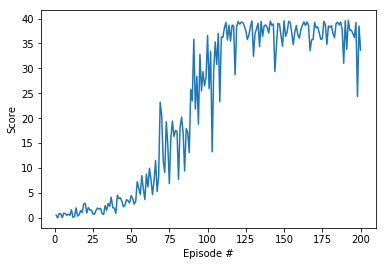

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(Result)+1), Result)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()